In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis

data = pd.read_csv("^GSPC.csv") 
df= pd.DataFrame(data)
SPY_Close=df[['Date','Close']]

log_return_list=[]
for i in range(1,len(SPY_Close)):
    log_return_list.append(math.log((SPY_Close.iloc[i][1]/SPY_Close.iloc[i-1][1])))
log_return_list=[0]+log_return_list

list_date=SPY_Close['Date'].tolist()

SPY_Returns = pd.DataFrame({'Date' : list_date,
                    'Returns' : log_return_list})

#print SPY_Returns
length_SPY_Returns=len(SPY_Returns)

In [10]:
SPY_Close.shape

(17437, 2)

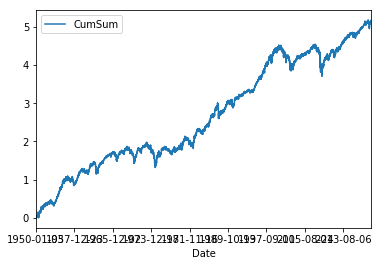

In [2]:
#Graph of SPY 500 Returns
SPY_Returns['CumSum'] = SPY_Returns.Returns.cumsum()
SPY_Returns.plot(x='Date', y='CumSum')
plt.show()

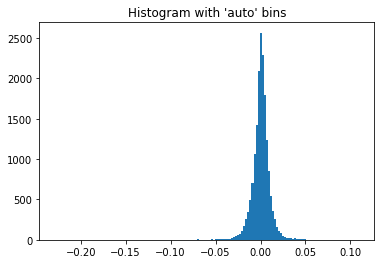

In [3]:
#Distribution of SPY 500 Returns
return_list=SPY_Returns['Returns'].tolist()
plt.hist(return_list, bins=150)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [4]:
#The stats for All years

print "mean: "+ str(np.mean(return_list))
print "Standard Deviation: "+ str(np.std(return_list))
print "Skewness: "+ str(skew(return_list))
print "kurtosis: "+ str(kurtosis(return_list))


mean: 0.000296048625080018
Standard Deviation: 0.009654933299169378
Skewness: -1.00502278013
kurtosis: 26.8546763295


How many subgroups do you want? 68

From 1950-01-03 to 1951-01-11
mean: 0.0009358707499361118
Standard Deviation: 0.00944313046411048
Skewness: -1.45191932448
kurtosis: 6.11949435972


From 1951-01-12 to 1952-01-23
mean: 0.0005711091850594588
Standard Deviation: 0.006524738522561185
Skewness: -0.278125755151
kurtosis: 0.922054638341


From 1952-01-24 to 1953-02-03
mean: 0.00030485831342596994
Standard Deviation: 0.00494381034764462
Skewness: -0.211839110489
kurtosis: 1.59321621528


From 1953-02-04 to 1954-02-11
mean: -7.101763914133498e-05
Standard Deviation: 0.0060213455771118175
Skewness: -1.08655892787
kurtosis: 3.65877624636


From 1954-02-12 to 1955-02-17
mean: 0.0013470143115307124
Standard Deviation: 0.006672376734930341
Skewness: -0.309383669927
kurtosis: 2.25186922617


From 1955-02-18 to 1956-02-27
mean: 0.0008017912453726167
Standard Deviation: 0.009439687940797232
Skewness: -1.38672411565
kurtosis: 11.7804893773


From 1956-02-28 to 1957-03-06
mean: -9.043295551607779e-05


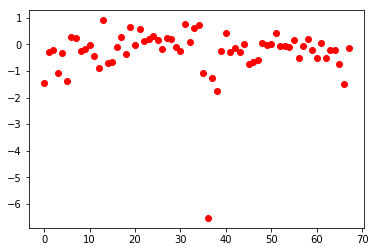

kurtosis Graph



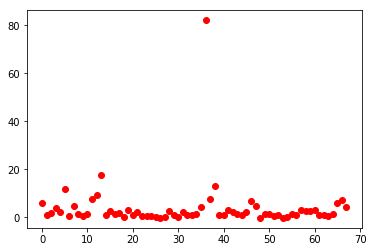

In [5]:
#Time Dependent Case
input_var_time_dependent = input("How many subgroups do you want? ")
#input_var=1
list_sub_dates=[]
list_sub_returns=[]
for i in range(0,input_var_time_dependent):
    list_sub_returns.append(np.array_split(SPY_Returns, input_var_time_dependent)[i]['Returns'].tolist())
    list_sub_dates.append(np.array_split(SPY_Returns, input_var_time_dependent)[i]['Date'].tolist())

for i in range(0,len(list_sub_returns)):
    print
    print "From "+list_sub_dates[i][0]+" to "+list_sub_dates[i][-1]
    print "mean: "+ str(np.mean(list_sub_returns[i]))
    print "Standard Deviation: "+ str(np.std(list_sub_returns[i]))
    print "Skewness: "+ str(skew(list_sub_returns[i]))
    print "kurtosis: "+ str(kurtosis(list_sub_returns[i]))
    print
print "Skewness Graph"
print
plt.plot([x for x in range(0,len(list_sub_returns))],[skew(list_sub_returns[i]) for i in range(0,len(list_sub_returns))], 'ro')
plt.show()
print "kurtosis Graph"
print
plt.plot([x for x in range(0,len(list_sub_returns))],[kurtosis(list_sub_returns[i]) for i in range(0,len(list_sub_returns))], 'ro')
plt.show()

How many subgroups do you want? 68

mean: 0.0002433256143353926
Standard Deviation: 0.00946950960543037
Skewness: 1.01295501931
kurtosis: 5.53952832828


mean: -0.00031722971695326133
Standard Deviation: 0.011633974333943782
Skewness: -1.89874765619
kurtosis: 15.746525367


mean: -0.0007545381507134506
Standard Deviation: 0.00917359960996335
Skewness: -0.353702118084
kurtosis: 1.5007966164


mean: 0.00019797394513018163
Standard Deviation: 0.010931467567616981
Skewness: -1.49346284861
kurtosis: 10.5928075454


mean: 0.0007914353423893011
Standard Deviation: 0.009328150246595139
Skewness: 0.361645784451
kurtosis: 1.25841884648


mean: 0.0005016276429150841
Standard Deviation: 0.009136033676135769
Skewness: -1.95021041522
kurtosis: 10.4646535104


mean: 0.0005801560839830489
Standard Deviation: 0.008085091901416293
Skewness: -0.220719718303
kurtosis: 0.846468761636


mean: 0.00037486024449046447
Standard Deviation: 0.008496697137414569
Skewness: -0.0863664067641
kurtosis: 4.65105177181



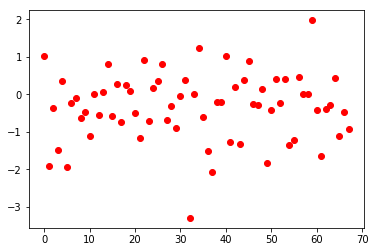

kurtosis Graph



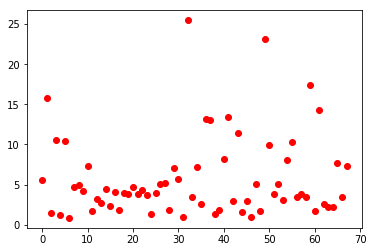

In [6]:
#Choose with Replacement
input_var_replacement = input("How many subgroups do you want? ")
num_each_group=len(return_list)/input_var_replacement
list_of_random_Returns_replacement=[]
for i in range(0,input_var_replacement):
    list_of_random_Returns_replacement.append(np.random.choice(return_list,num_each_group))
#print list_of_random_Returns


for i in list_of_random_Returns_replacement:
    print
    print "mean: "+ str(np.mean(i))
    print "Standard Deviation: "+ str(np.std(i))
    print "Skewness: "+ str(skew(i))
    print "kurtosis: "+ str(kurtosis(i))
    print
print "Skewness Graph"
print
plt.plot([x for x in range(0,len(list_of_random_Returns_replacement))],[skew(i) for i in list_of_random_Returns_replacement], 'ro')
plt.show()
print "kurtosis Graph"
print
plt.plot([x for x in range(0,len(list_of_random_Returns_replacement))],[kurtosis(i) for i in list_of_random_Returns_replacement], 'ro')
plt.show()

How many subgroups do you want? 68

mean: 0.0004261714479565573
Standard Deviation: 0.010568063951189359
Skewness: -2.47575386839
kurtosis: 24.0676669559


mean: 3.143650512441406e-06
Standard Deviation: 0.008300448191253522
Skewness: -0.876678637901
kurtosis: 5.47971068378


mean: 0.0008558637820081777
Standard Deviation: 0.012198845935661038
Skewness: -0.917023603927
kurtosis: 16.9169153693


mean: -0.00018708096767643335
Standard Deviation: 0.009257949894674069
Skewness: 0.122069834264
kurtosis: 4.63001455326


mean: 0.0005400017473892269
Standard Deviation: 0.009189330003816328
Skewness: 0.307007848018
kurtosis: 5.99816986162


mean: 0.00025324801253495037
Standard Deviation: 0.010110153863176539
Skewness: -1.11872577701
kurtosis: 10.2297901269


mean: 8.593975113257377e-05
Standard Deviation: 0.008788003691579033
Skewness: -0.219930788291
kurtosis: 2.34542869886


mean: -0.00015158986758559542
Standard Deviation: 0.008703084135295362
Skewness: -0.0334185781617
kurtosis: 1.21784391

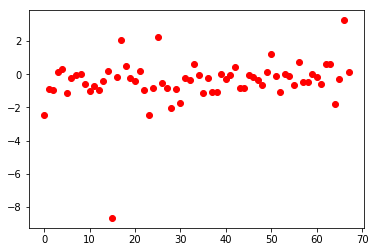

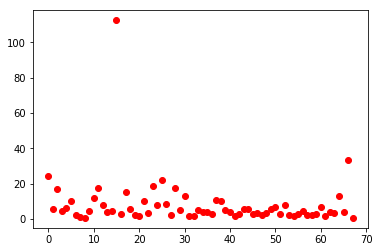

In [7]:
#Choose without Replacement
import random
input_var_no_replacement = input("How many subgroups do you want? ")

return_list_new=[]
return_list_new=return_list
    
num_each_group=len(return_list_new)/input_var_no_replacement
list_of_random_Returns_no_replacement=[]
for i in range(0,input_var_no_replacement-1):
    temp=np.random.choice(return_list_new,num_each_group,replace=False)
    list_of_random_Returns_no_replacement.append(temp)
    return_list_new=[x for x in return_list_new if x not in temp] 
list_of_random_Returns_no_replacement.append(return_list_new)

# print (len(list_of_random_Returns_no_replacement[0]))
# print (len(list_of_random_Returns_no_replacement[1]))
# print (len(list_of_random_Returns_no_replacement[2]))
# print (len(list_of_random_Returns_no_replacement[3]))
for i in list_of_random_Returns_no_replacement:
    print
    print "mean: "+ str(np.mean(i))
    print "Standard Deviation: "+ str(np.std(i))
    print "Skewness: "+ str(skew(i))
    print "kurtosis: "+ str(kurtosis(i))
    print

plt.plot([x for x in range(0,len(list_of_random_Returns_no_replacement))],[skew(i) for i in list_of_random_Returns_no_replacement], 'ro')
plt.show()

plt.plot([x for x in range(0,len(list_of_random_Returns_no_replacement))],[kurtosis(i) for i in list_of_random_Returns_no_replacement], 'ro')
plt.show()